In [1]:
import pandas as pd
import seaborn as sns
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib
%matplotlib inline



## Extract Data from CSV

In [2]:
athlete_events_csv_file = "./athlete_events.csv"
df_athlete_events_data = pd.read_csv(athlete_events_csv_file)
df_athlete_events_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df_athlete_events_data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
noc_regions_file = "./noc_regions.csv"
df_noc_regions_data = pd.read_csv(noc_regions_file)
df_noc_regions_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df_noc_regions_data.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


## Transform Data

In [6]:
#Select female participants for the Olympics 
df_female = df_athlete_events_data[df_athlete_events_data.Sex == 'F']
df_female.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df_female.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [8]:
#select male participants for the Olympics 
df_male = df_athlete_events_data[df_athlete_events_data.Sex == 'M']
df_male.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [9]:
#Only select columns needed for Olympic Analysis 
select_col = ['Sex', 'Name', 'NOC', 'Event', 'Season', 'Year', 'Sport']
df_athlete_events_data = df_athlete_events_data[select_col]
df_athlete_events_data.head()


,Sex,Name,NOC,Event,Season,Year,Sport
0,M,A Dijiang,CHN,Basketball Men's Basketball,Summer,1992,Basketball
1,M,A Lamusi,CHN,Judo Men's Extra-Lightweight,Summer,2012,Judo
2,M,Gunnar Nielsen Aaby,DEN,Football Men's Football,Summer,1920,Football
3,M,Edgar Lindenau Aabye,DEN,Tug-Of-War Men's Tug-Of-War,Summer,1900,Tug-Of-War
4,F,Christine Jacoba Aaftink,NED,Speed Skating Women's 500 metres,Winter,1988,Speed Skating


In [10]:
df_athlete_events_data.tail()

,Sex,Name,NOC,Event,Season,Year,Sport
271111,M,Andrzej ya,POL,Luge Mixed (Men)'s Doubles,Winter,1976,Luge
271112,M,Piotr ya,POL,"Ski Jumping Men's Large Hill, Individual",Winter,2014,Ski Jumping
271113,M,Piotr ya,POL,"Ski Jumping Men's Large Hill, Team",Winter,2014,Ski Jumping
271114,M,Tomasz Ireneusz ya,POL,Bobsleigh Men's Four,Winter,1998,Bobsleigh
271115,M,Tomasz Ireneusz ya,POL,Bobsleigh Men's Four,Winter,2002,Bobsleigh


In [11]:
#Drop unwanted columns
df_female_unique = df_female.drop_duplicates('Event')
df_female_unique.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN


## Female and Male Olympic Participation Comparison

In [12]:
df_year_female = df_female.groupby('Year').count()['Sport'].to_frame()
df_year_female.head()


,Sport
Year,
1900,33
1904,16
1906,11
1908,47
1912,87


In [13]:
df_year_female.tail()

,Sport
Year,
2008,5816
2010,1847
2012,5815
2014,2023
2016,6223


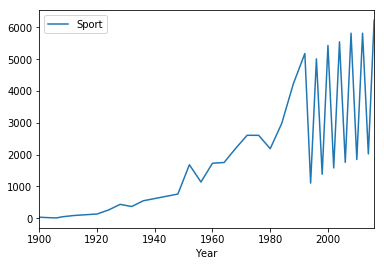

In [14]:
#show graph of female representation in Olympic sports since 1900 to 2016
df_year_female.plot.line()

In [15]:
#show graph of male representation in Olympic sports since 1896
df_year_male = df_male.groupby('Year').count()['Sport'].to_frame()
df_year_male.head()

,Sport
Year,
1896,380
1900,1903
1904,1285
1906,1722
1908,3054


In [16]:
df_year_male.tail()

,Sport
Year,
2008,7786
2010,2555
2012,7105
2014,2868
2016,7465


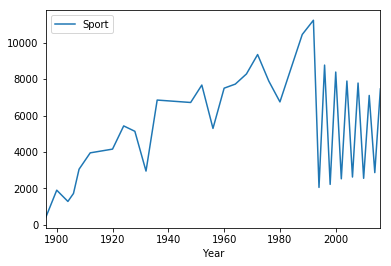

In [17]:
df_year_male.plot.line()

In [18]:
#Countries that have the highest female participation 
df_year_female = df_female.groupby('NOC').count()['Sport'].to_frame()
df_year_female.head()

,Sport
NOC,
AFG,5
AHO,12
ALB,27
ALG,94
AND,42


In [19]:
df_year_female.tail()

,Sport
NOC,
VNM,2
YEM,4
YUG,378
ZAM,19
ZIM,113


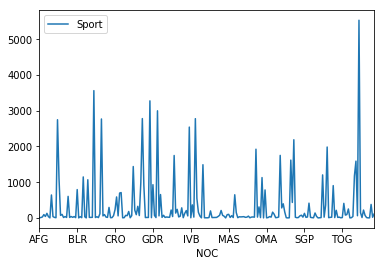

In [20]:
df_year_female.plot.line()

In [21]:
#Sport that has the highest female participation 
df_year_female = df_female.groupby('Sport').count()['Team'].to_frame()
df_year_female.head()

,Team
Sport,
Alpine Skiing,3398
Alpinism,1
Archery,1015
Art Competitions,377
Athletics,11666


In [22]:
df_year_female.tail

<bound method NDFrame.tail of                             Team
Sport                           
Alpine Skiing               3398
Alpinism                       1
Archery                     1015
Art Competitions             377
Athletics                  11666
Badminton                    740
Basketball                  1256
Beach Volleyball             276
Biathlon                    1863
Bobsleigh                    143
Boxing                        72
Canoeing                    1380
Croquet                        6
Cross Country Skiing        3385
Curling                      222
Cycling                     1394
Diving                      1210
Equestrianism               1246
Fencing                     2000
Figure Skating              1172
Football                    1012
Freestyle Skiing             433
Golf                          70
Gymnastics                  9129
Handball                    1401
Hockey                      1459
Ice Hockey                   754
Judo         

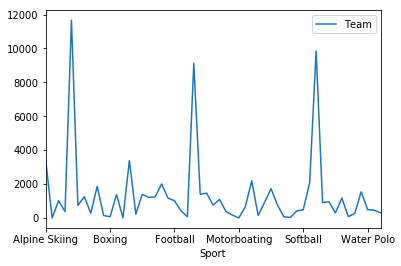

In [23]:
df_year_female.plot.line()

In [24]:
#Medals wont by female participants
df_year_female = df_female.groupby('Medal').count()['Sport'].to_frame()
df_year_female.head()

,Sport
Medal,
Bronze,3771
Gold,3747
Silver,3735


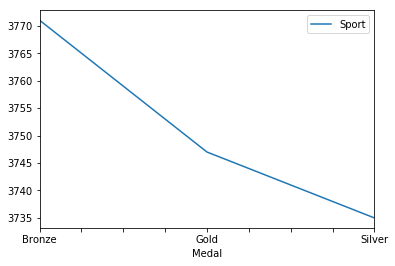

In [25]:
df_year_female.plot.line()

In [26]:
#Medals won by male participants
df_year_male = df_male.groupby('Medal').count()['Sport'].to_frame()
df_year_male.head()

,Sport
Medal,
Bronze,9524
Gold,9625
Silver,9381


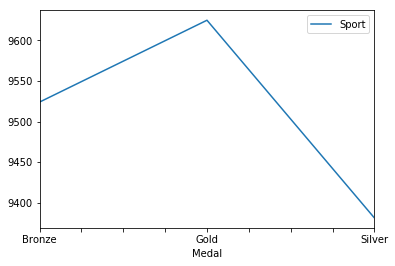

In [27]:
df_year_male.plot.line()

In [28]:
#Olympic Season that has the highest female participation 
df_year_female = df_female.groupby('Season').count()['Sport'].to_frame()
df_year_female.head()

,Sport
Season,
Summer,59443
Winter,15079


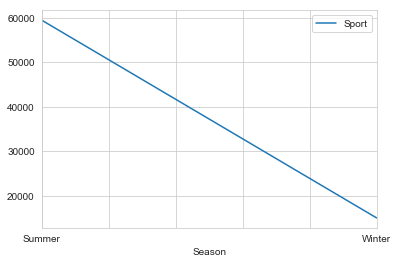

In [37]:
df_year_female.plot.line()

In [38]:
#Olympic season that has the highest male participation 
df_year_male = df_male.groupby('Season').count()['Sport'].to_frame()
df_year_male.head()

,Sport
Season,
Summer,163109
Winter,33485


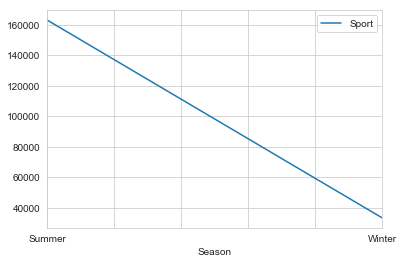

In [39]:
df_year_male.plot.line()

In [40]:
df_noc_regions_data.shape

(230, 3)

In [41]:
df_noc_regions_data.columns

Index(['NOC', 'region', 'notes'], dtype='object')